# Experiment with data manipulation
### Notebook used for experimentation with written functions and used for their development/trial
This notebook doesn't contain production sollution. It was used for development.
It is not part of the functional sollution.

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns
from scipy.optimize import minimize
import re


# import sys
# import os

# sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), "..")))

from config.constants_config import (
    BASE_TICKER_SET,
    BASE_START_DATE,
    BASE_TODAY_DATE,
    BASE_END_DATE,
)

from functions.data_manipulation_functions import (
    load_raw_stocks_data,
    transform_raw_stocks_data,
    load_raw_bond_yields_data,
    join_stocks_bonds,
    convert_anualized_rate_to_daily,
    filter_by_date,
    select_relevant_cols,
)

from functions.data_exploration_functions import (
    plot_df,
    get_missing_and_zero_values,
    get_descriptive_statistics,
    barplot_means,
    plot_covariances_matrix,
    plot_autocorrelation,
)

from functions.portfolio_functions import (
    portfolio_variance,
    portfolio_std,
    _efficient_frontier_opt,
    _plot_efficient_frontier_results,
    efficient_frontier_complete,
    _plot_efficient_frontier_riskless,
    _compute_tangent_portfolio,
    efficient_frontier_complete_riskless,
    _compute_mark_helper_quantities,
    compute_sharpe_nonnegative_weights_external,
    compute_max_sharpe_weights,
    compute_inverse_volatility_weighed_portfolio,
    compute_minimum_variance_portfolio,
    compute_markowitz_weights,
)

plt.rcParams["figure.figsize"] = [8, 6]

BASE_TICKER_SET = sorted(BASE_TICKER_SET)

In [2]:
raw_data = load_raw_stocks_data(BASE_TICKER_SET, BASE_START_DATE, BASE_END_DATE)

[*********************100%***********************]  8 of 8 completed


In [3]:
alt_df = transform_raw_stocks_data(raw_data)

In [4]:
alt_df[[col for col in alt_df.columns if "EXC" in col]]

Ticker,EXC_open,EXC_close,EXC_interdaily_pct_change,EXC_daily_open_pct_change_raw,EXC_daily_open_pct_change_norm,EXC_daily_close_pct_change_raw,EXC_daily_close_pct_change_norm,EXC_interdaily_pct_change_log,EXC_daily_open_pct_change_raw_log,EXC_daily_close_pct_change_raw_log,EXC_daily_open_pct_change_norm_log,EXC_daily_close_pct_change_norm_log
Date,,,,,,,,,,,,
2021-01-04,26.268334,25.494278,-0.029467,NaN,NaN,NaN,NaN,-0.029910,NaN,NaN,NaN,NaN
2021-01-05,25.519054,25.457130,-0.002427,-0.028524,-0.028524,-0.001457,-0.001457,-0.002429,-0.028939,-0.001458,-0.028939,-0.001458
2021-01-06,25.636707,26.286913,0.025362,0.004610,0.004610,0.032595,0.032595,0.025046,0.004600,0.032075,0.004600,0.032075
2021-01-07,26.286913,26.026831,-0.009894,0.025362,0.025362,-0.009894,-0.009894,-0.009943,0.025046,-0.009943,0.025046,-0.009943
2021-01-08,26.014448,26.138298,0.004761,-0.010365,-0.010365,0.004283,0.004283,0.004750,-0.010419,0.004274,-0.010419,0.004274
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-18,40.333566,40.541470,0.005155,-0.007068,-0.007068,0.004415,0.004415,0.005141,-0.007093,0.004405,-0.007093,0.004405
2024-10-21,40.491966,40.095955,-0.009780,0.003927,0.001309,-0.010989,-0.003663,-0.009828,0.003920,-0.011050,0.001308,-0.003670
2024-10-22,39.977155,40.125656,0.003715,-0.012714,-0.012714,0.000741,0.000741,0.003708,-0.012795,0.000740,-0.012795,0.000740


In [5]:
bond_yields = load_raw_bond_yields_data()
yields_df = convert_anualized_rate_to_daily(bond_yields)
comb_df = join_stocks_bonds(alt_df, yields_df)

c:\Users\stepa\Documents\fit_python\semestral\functions\data_manipulation_functions.py:259: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  joined_df["daily_riskless_yield"].fillna(


In [6]:
print(f"{alt_df.shape=}")
print(f"{yields_df.shape=}")
print(f"{comb_df.shape=}")

alt_df.shape=(959, 97)
yields_df.shape=(1457, 13)
comb_df.shape=(959, 110)


## Basic data exploration functionality

#### Missing / Null values, Plotting

In [8]:
get_missing_and_zero_values(
    comb_df, get_missing=True, get_zero=True, print_results=True
)
get_missing_and_zero_values(
    comb_df,
    start_date=BASE_START_DATE,
    end_date=BASE_END_DATE,
    get_missing=True,
    get_zero=True,
    print_results=True,
)

Following missing values were found:
Missing values: days_diff                          1
ADSK_daily_open_pct_change_raw     1
ADSK_daily_open_pct_change_norm    1
ANSS_daily_open_pct_change_raw     1
ANSS_daily_open_pct_change_norm    1
                                  ..
5 Yr                               6
7 Yr                               6
10 Yr                              6
20 Yr                              6
30 Yr                              6
Length: 77, dtype: int64
Following zero values were found:
Zero values: ADSK_interdaily_pct_change               1
ANSS_interdaily_pct_change               3
COST_interdaily_pct_change               2
EXC_interdaily_pct_change               13
PCAR_interdaily_pct_change               4
                                        ..
SIRI_daily_close_pct_change_norm_log    39
ZS_daily_close_pct_change_norm_log       1
1 Mo                                     9
2 Mo                                     1
daily_riskless_yield                  

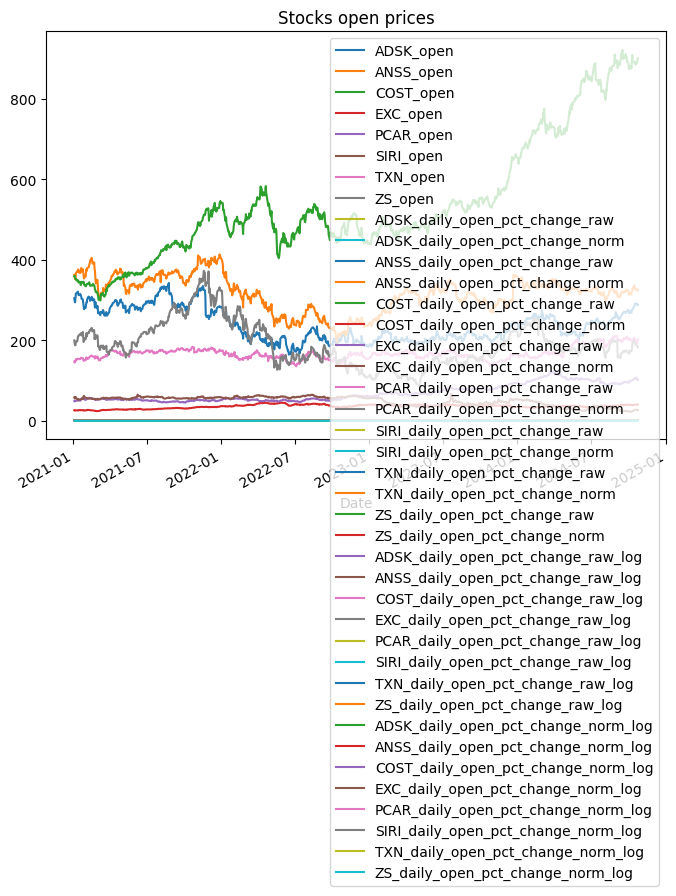

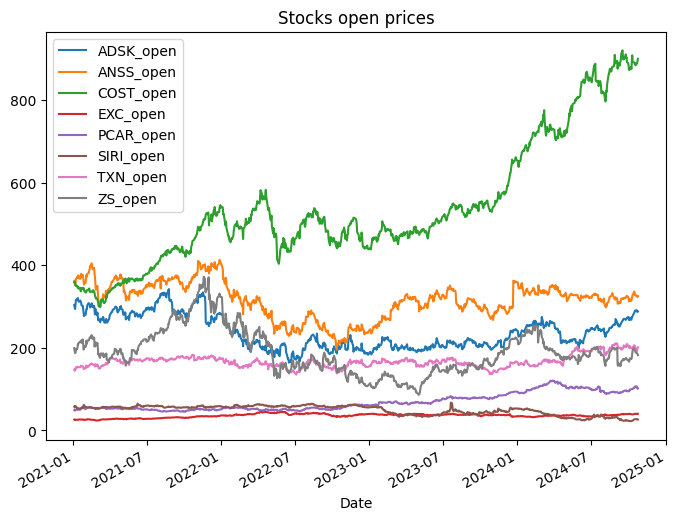

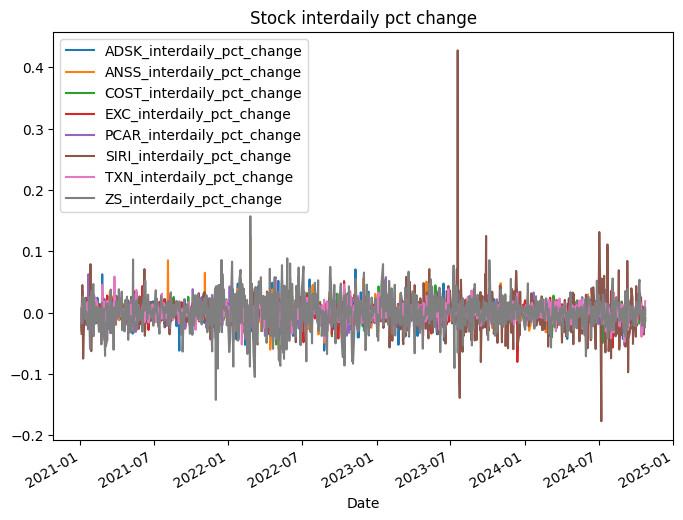

In [9]:
plot_df(
    comb_df,
    start_date=BASE_START_DATE,
    end_date=BASE_END_DATE,
    title="Stocks open prices",
    col_substring="open",
)
plot_df(
    comb_df,
    start_date=BASE_START_DATE,
    end_date=BASE_END_DATE,
    title="Stocks open prices",
    col_regexp_substring=r"_open$",
)
plot_df(
    comb_df,
    start_date=BASE_START_DATE,
    end_date=BASE_END_DATE,
    title="Stock interdaily pct change",
    col_regexp_substring=r"interdaily_pct_change$",
)

#### Basic descriptive statistics

In [10]:
means, var, covs, corr = get_descriptive_statistics(
    comb_df,
    print_stats=True,
    start_date=BASE_START_DATE,
    end_date=BASE_END_DATE,
    col_regexp_substring=r"interdaily_pct_change$",
)

Means: 
ADSK_interdaily_pct_change    0.000241
ANSS_interdaily_pct_change   -0.000193
COST_interdaily_pct_change    0.000735
EXC_interdaily_pct_change     0.000386
PCAR_interdaily_pct_change    0.000109
SIRI_interdaily_pct_change   -0.000950
TXN_interdaily_pct_change     0.000079
ZS_interdaily_pct_change     -0.000340
dtype: float64
Variances: 
ADSK_interdaily_pct_change    0.000338
ANSS_interdaily_pct_change    0.000293
COST_interdaily_pct_change    0.000152
EXC_interdaily_pct_change     0.000158
PCAR_interdaily_pct_change    0.000176
SIRI_interdaily_pct_change    0.000762
TXN_interdaily_pct_change     0.000202
ZS_interdaily_pct_change      0.000814
dtype: float64
Conditional number of the covariance matrix: 15.88005779464518
Df describe results: 
       ADSK_interdaily_pct_change  ANSS_interdaily_pct_change  \
count                  959.000000                  959.000000   
mean                     0.000241                   -0.000193   
std                      0.018379             

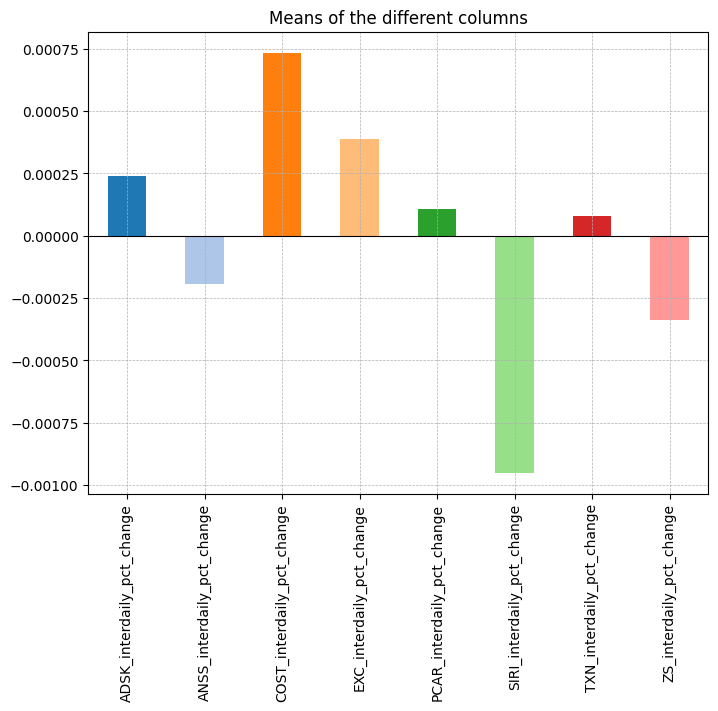

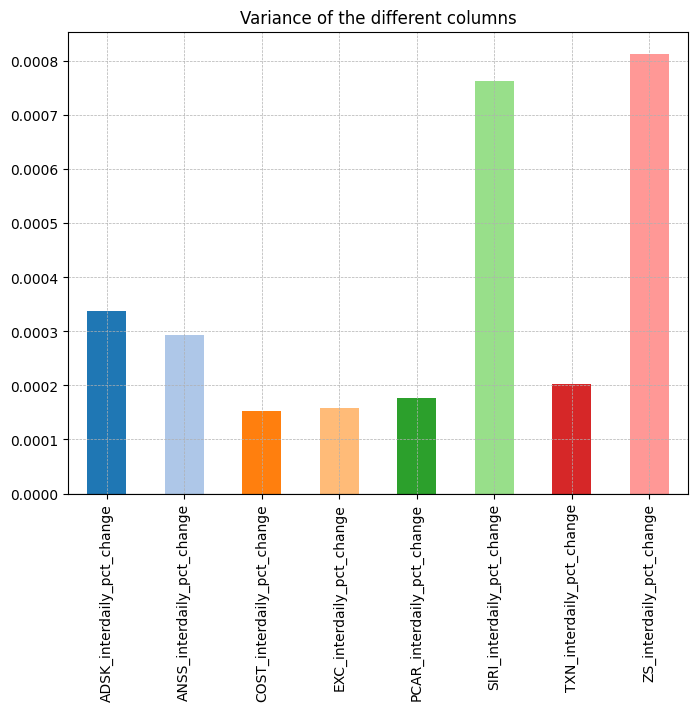

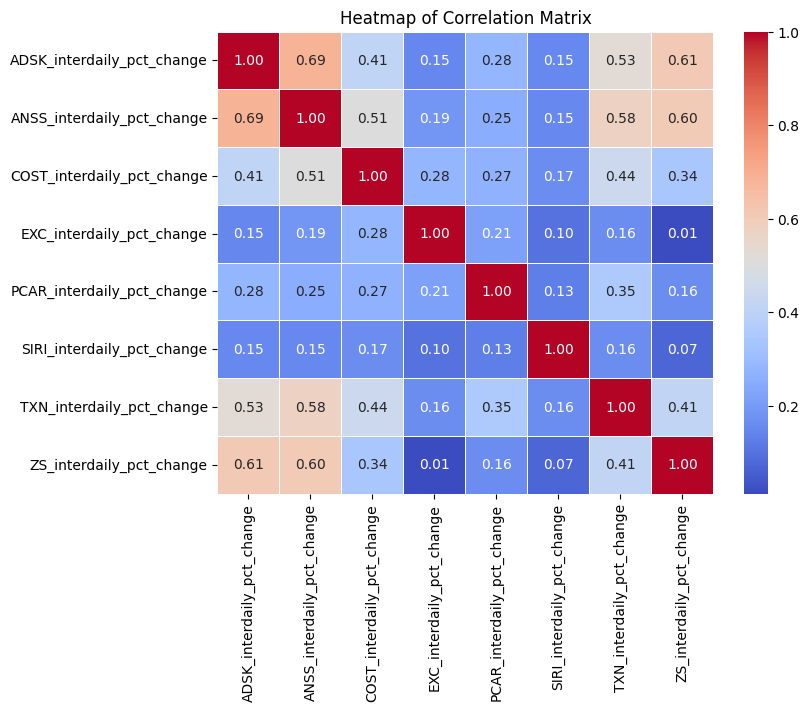

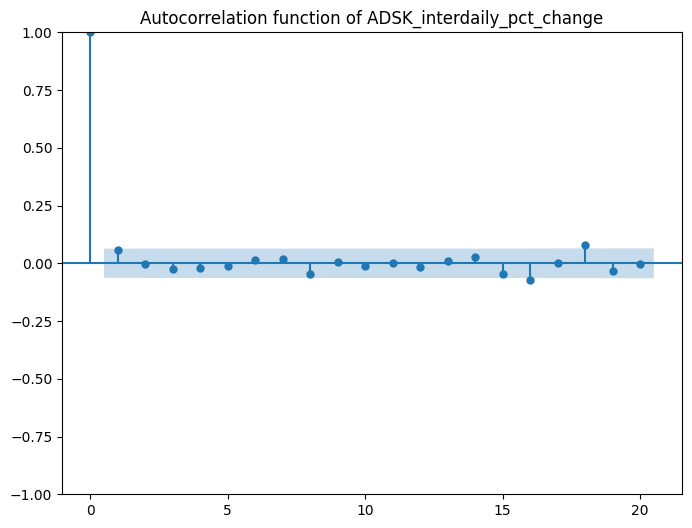

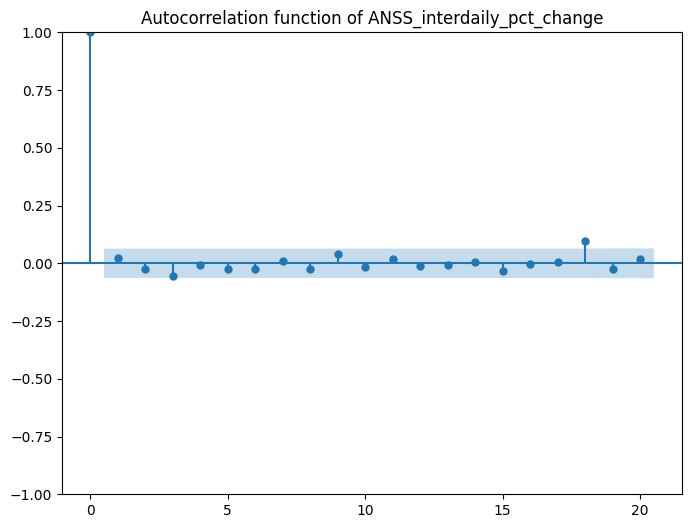

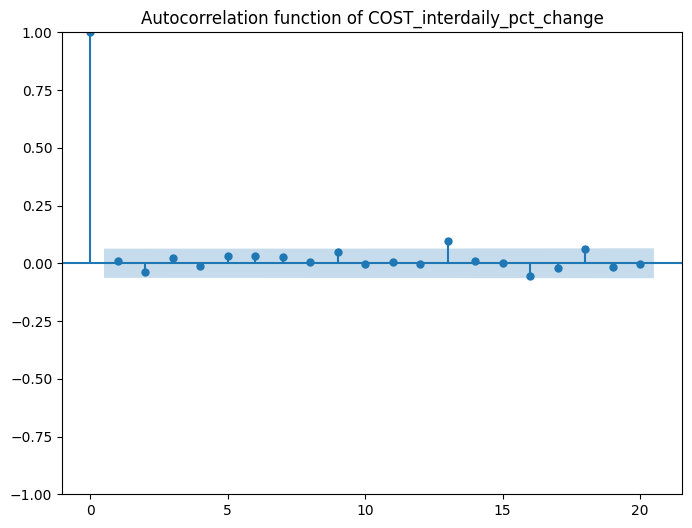

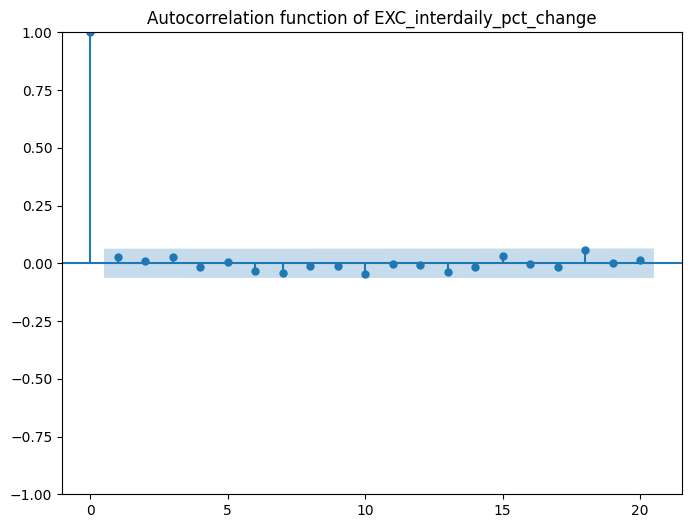

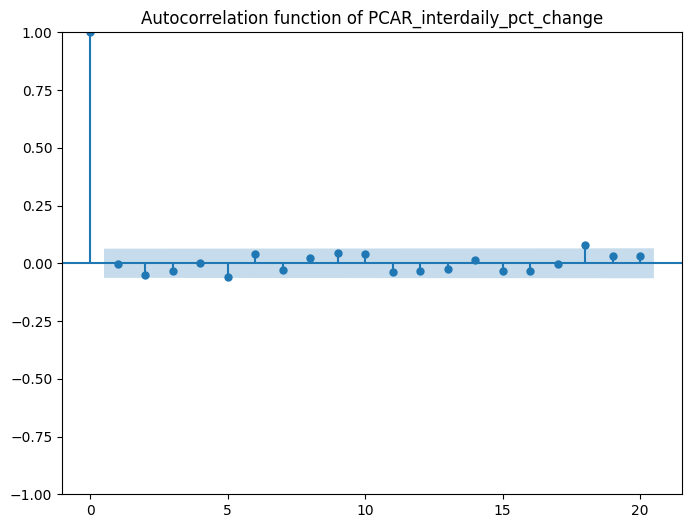

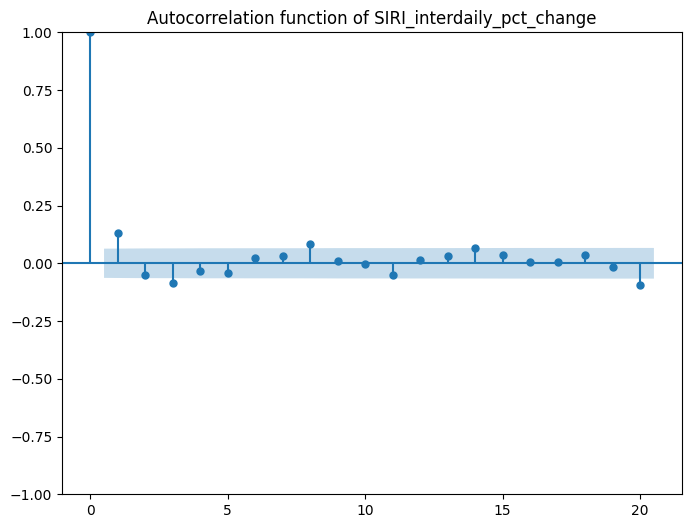

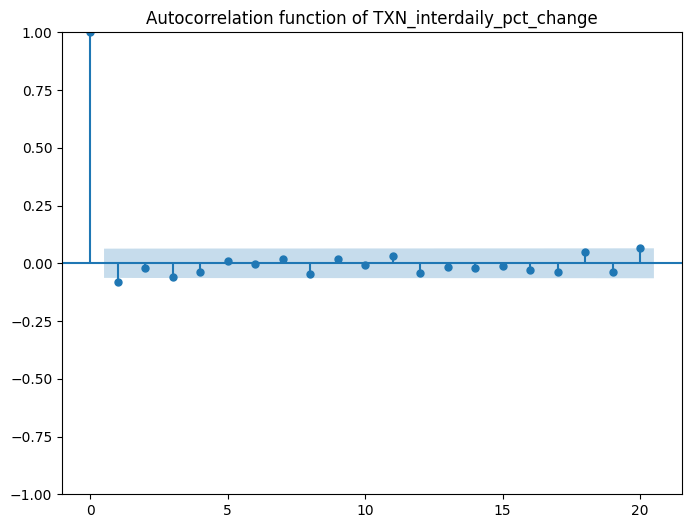

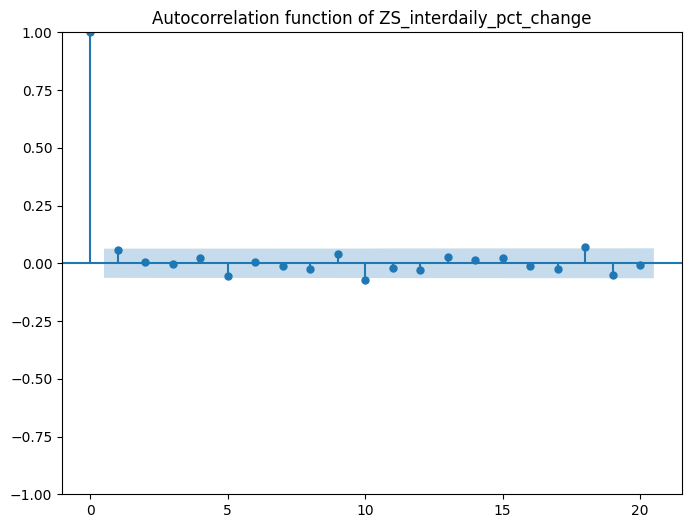

In [11]:
barplot_means(means)
plot_covariances_matrix(var, corr, plot_variance_bar=True, plot_heatmap=True)
plot_autocorrelation(
    comb_df,
    start_date=BASE_START_DATE,
    end_date=BASE_END_DATE,
    col_regexp_substring=r"interdaily_pct_change$",
)

## Efficiency frontier w/o riskless asset

In [12]:
# # Just repeated call for a better readability
# means, var, covs, corr = get_descriptive_statistics(comb_df, print_stats=False, start_date = base_start_date, end_date = base_today_date, col_regexp_substring = r"interdaily_pct_change$")

# target_returns = np.linspace(means.min()*6, means.max()*9, 100)

# efficient_results = _efficient_frontier_opt(means, covs, target_returns)

In [13]:
means

ADSK_interdaily_pct_change    0.000241
ANSS_interdaily_pct_change   -0.000193
COST_interdaily_pct_change    0.000735
EXC_interdaily_pct_change     0.000386
PCAR_interdaily_pct_change    0.000109
SIRI_interdaily_pct_change   -0.000950
TXN_interdaily_pct_change     0.000079
ZS_interdaily_pct_change     -0.000340
dtype: float64

In [14]:
# def plot_efficient_frontier_results(
#         efficient_results: list[tuple[float, float]], plot_individual_stocks: bool = True, means: pd.Series = None, var: pd.Series = None
# ) -> None:
#     """
#     Plot efficient frontier (without riskless asset)
#     If plot individual stocks is True, also plot the individual stocks (sample means and variances must be then provided)
#     """
#     # Unpack the computed optimal values
#     opt_means, opt_stds = zip(*efficient_results)

#     plt.plot(opt_stds, opt_means, label="Efficient Frontier")
#     plt.title('Efficient Frontier (Without Risk-Free Asset)')
#     plt.xlabel('Standard deviation')
#     plt.ylabel('Mean')
#     plt.grid()
#     plt.axhline(0, color="black", linewidth=0.8)
#     plt.xlim(left=-0.001) # Enforce left starting point of x axis to be 0

#     if plot_individual_stocks:
#         if means is not None and var is not None:
#             stock_stds = np.sqrt(var)

#             for index in means.keys():
#                 index_name = index.split("_")[0]
#                 plt.scatter([stock_stds[index]], [means[index]], color='green')
#                 plt.text(stock_stds[index], means[index], index_name, fontsize=9, ha='center', va='bottom')

#         else:
#             raise ValueError("If plot_individual_stocks is True, means and var must be provided")

#     plt.legend()
#     plt.show()

# from functions.portfolio_functions import efficient_frontier_complete

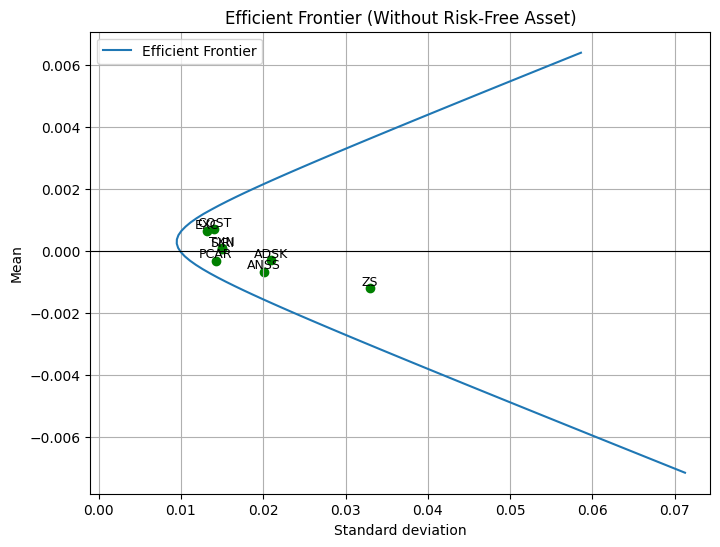

In [15]:
means, var, covs, corr = get_descriptive_statistics(
    comb_df,
    print_stats=False,
    start_date=BASE_START_DATE,
    end_date=BASE_TODAY_DATE,
    col_regexp_substring=r"interdaily_pct_change$",
)
efficient_results = efficient_frontier_complete(means, covs, var)

## Markowitz efficient portfolios with riskless asset (bonds)

In [16]:
means, var, covs, corr = get_descriptive_statistics(
    comb_df,
    print_stats=False,
    start_date=BASE_START_DATE,
    end_date=BASE_TODAY_DATE,
    col_regexp_substring=r"interdaily_pct_change$",
)

## Set of markowitz efficient portfolios depend on todays riskless rate
riskless_rate = comb_df["daily_riskless_yield"].loc[BASE_TODAY_DATE]
print(riskless_rate)

0.0001392062224645496


In [17]:
# def efficient_frontier_complete_riskless(means: pd.Series, covs:pd.DataFrame, var: pd.Series, riskless_rate: float, plot_individual_stocks: bool = True, plot_results: bool = True, mean_tangent_mult: float = 1.5):
#     """
#     Compute the efficient frontier with a riskless asset
#     """
#     efficient_results = efficient_frontier_complete(means, covs, var, plot_results=False)

#     weights_tangent, mean_tangent, std_tangent = _compute_tangent_portfolio(means, covs, riskless_rate)

#     _plot_efficient_frontier_riskless(efficient_results, means, var, riskless_rate, plot_individual_stocks=plot_individual_stocks, plot_results = plot_results,
#                                        mean_tangent=mean_tangent, std_tangent=std_tangent, mean_tangent_mul=mean_tangent_mult)


#     return weights_tangent, mean_tangent, std_tangent

In [18]:
weights_tangent, mean_tangent, std_tangent = _compute_tangent_portfolio(
    means, covs, riskless_rate
)

In [19]:
np.sqrt(weights_tangent.T @ covs @ weights_tangent)

0.05919761511870443

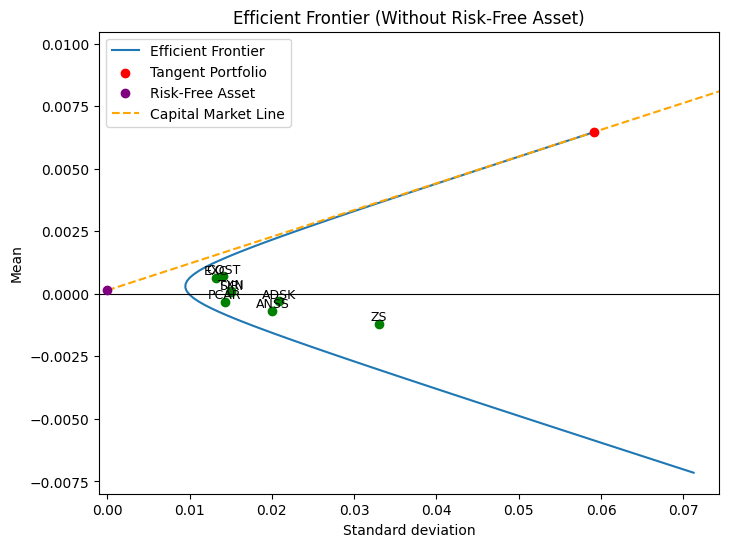

(array([ 1.00452471, -2.99576697,  3.36758625,  1.33477687, -2.23954326,
        -0.20024878,  1.31457191, -0.58590074]),
 0.006468750817138234,
 0.05919761511870443)

In [20]:
efficient_frontier_complete_riskless(
    means,
    covs,
    var,
    riskless_rate,
    plot_individual_stocks=True,
    plot_results=True,
    mean_tangent_mult=1.5,
)

## Markowitz portfolio

In [21]:
means, var, covs, corr = get_descriptive_statistics(
    comb_df,
    print_stats=False,
    start_date=BASE_START_DATE,
    end_date=BASE_TODAY_DATE,
    col_regexp_substring=r"interdaily_pct_change$",
)

In [22]:
# def compute_markowitz_weights(means, covs, riskless_rate, required_return):

#     inv_cov, unit_vec, A, B, C = _compute_mark_helper_quantities(means, covs)

#     nominator = (required_return-riskless_rate) * (inv_cov @ (means - (riskless_rate*means)))
#     denominator = (C-(2*B*riskless_rate) + (A*(riskless_rate**2)))

#     shares_weights = nominator/denominator

#     riskfree_asset_weight = 1 - np.dot(shares_weights, unit_vec)

#     return shares_weights, riskfree_asset_weight

In [23]:
len(means)

8

In [24]:
share_weights, riskfree_asset_weight = compute_markowitz_weights(
    means, covs, riskless_rate, 0.001
)

mean = np.dot(means, share_weights) + riskfree_asset_weight * riskless_rate
std = portfolio_std(share_weights, covs)

In [25]:
# def compute_sharpe_nonnegative_weights_external(means: pd.Series, covs: pd.DataFrame, riskless_rate: float):
#     """
#     Compute the sharpe ratio maximizing portfolio with non-negative weights
#     Functionality imported from the gurobi_optimods package
#     """
#     sharpe_share_results = max_sharpe_ratio(covs, means, rf_rate=riskless_rate)
#     sharpe_share_weights = sharpe_share_results.x

#     return sharpe_share_weights


sharpe_share_weights = compute_sharpe_nonnegative_weights_external(
    means, covs, riskless_rate
)

mean_sharpe = np.dot(means, sharpe_share_weights)
std_sharpe = portfolio_std(sharpe_share_weights, covs)

Restricted license - for non-production use only - expires 2026-11-23
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 11.0 (22631.2))

CPU model: AMD Ryzen 7 PRO 6850H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 1 rows, 8 columns and 8 nonzeros
Model fingerprint: 0x776a9438
Model has 36 quadratic objective terms
Coefficient statistics:
  Matrix range     [5e-05, 1e-03]
  Objective range  [0e+00, 0e+00]
  QObjective range [7e-05, 2e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 1 rows, 8 columns, 8 nonzeros
Presolved model has 36 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 7
 AA' NZ     : 2.800e+01
 Factor NZ  : 3.600e+01
 Factor Ops : 2.040e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal 

In [26]:
# def compute_max_sharpe_weights(means:pd.Series, covs: pd.DataFrame, riskless_rate: float):
#     """
#     Compute the sharpe ratio maximizing portfolio without bounding conditions
#     Derivation can be found eg. in https://faculty.washington.edu/ezivot/econ424/portfolioTheoryMatrix.pdf
#     """
#     inv_cov = np.linalg.inv(covs)
#     riskless_adjusted_means = means - riskless_rate
#     unit_vec = np.ones_like(means)

#     nominator = inv_cov @ riskless_adjusted_means
#     denominator = unit_vec @ inv_cov @ riskless_adjusted_means

#     sharpe_weights = nominator/denominator

#     return sharpe_weights

In [27]:
max_sharpe_share_weights = compute_max_sharpe_weights(means, covs, riskless_rate)

mean_max_sharpe = np.dot(means, max_sharpe_share_weights)
std_max_sharpe = portfolio_std(max_sharpe_share_weights, covs)

In [28]:
inverse_volatility_weights = compute_inverse_volatility_weighed_portfolio(var)

mean_inverse_volatility = np.dot(means, inverse_volatility_weights)
std_inverse_volatility = portfolio_std(inverse_volatility_weights, covs)

In [29]:
minimum_variance_weights = compute_minimum_variance_portfolio(means, covs)

mean_min_variance = np.dot(means, minimum_variance_weights)
std_min_variance = portfolio_std(minimum_variance_weights, covs)

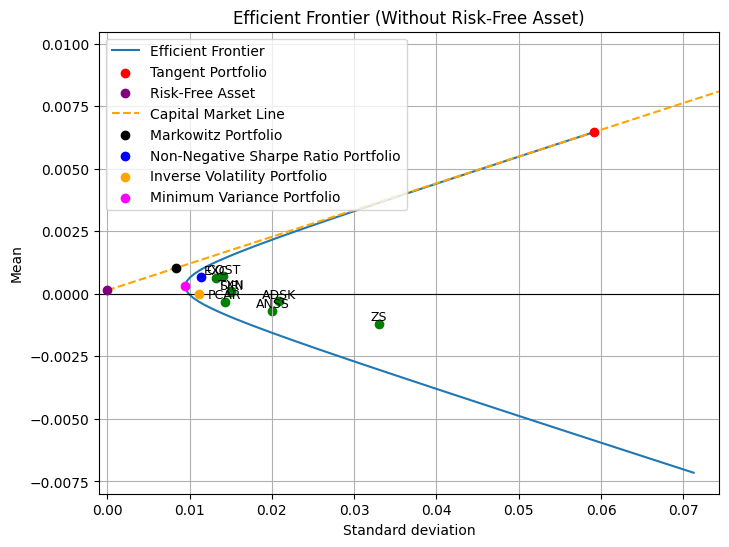

In [30]:
efficient_frontier_complete_riskless(
    means,
    covs,
    var,
    riskless_rate,
    plot_individual_stocks=True,
    plot_results=False,
    mean_tangent_mult=1.5,
)
plt.scatter(std, mean, color="black", label="Markowitz Portfolio", zorder=2)
plt.scatter(
    std_sharpe,
    mean_sharpe,
    color="blue",
    label="Non-Negative Sharpe Ratio Portfolio",
    zorder=2,
)
# plt.scatter(std_max_sharpe, mean_max_sharpe, color="orange", label="Sharpe Ratio Portfolio", zorder =2)
plt.scatter(
    std_inverse_volatility,
    mean_inverse_volatility,
    color="orange",
    label="Inverse Volatility Portfolio",
    zorder=2,
)
plt.scatter(
    std_min_variance,
    mean_min_variance,
    color="magenta",
    label="Minimum Variance Portfolio",
    zorder=2,
)
plt.legend()
plt.grid()
plt.show()